`Add csv files on to colab..`

    Install RDKit library to start working with python...

In [ ]:
# Install RDKit. 
!pip install kora
import kora.install.rdkit

In [ ]:
import kora.install.rdkit

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

`Reading Sider data... (Smiles + ADR Labels)`

In [ ]:
import pandas as pd

sider = pd.read_csv('sider.csv')

sider.head()

,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Product issues,Eye disorders,Investigations,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Social circumstances,Immune system disorders,Reproductive system and breast disorders,"Neoplasms benign, malignant and unspecified (incl cysts and polyps)",General disorders and administration site conditions,Endocrine disorders,Surgical and medical procedures,Vascular disorders,Blood and lymphatic system disorders,Skin and subcutaneous tissue disorders,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications"
0,C(CNCCNCCNCCN)N,1,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,1,0
1,CC(C)(C)C1=CC(=C(C=C1NC(=O)C2=CNC3=CC=CC=C3C2=...,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0
2,CC[C@]12CC(=C)[C@H]3[C@H]([C@@H]1CC[C@]2(C#C)O...,0,1,0,1,1,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
3,CCC12CC(=C)C3C(C1CC[C@]2(C#C)O)CCC4=CC(=O)CCC34,1,1,0,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,0,1,1
4,C1C(C2=CC=CC=C2N(C3=CC=CC=C31)C(=O)N)O,1,1,0,1,1,1,1,0,1,0,0,1,0,0,1,1,1,0,1,1,1,0,0,1,0,1,0


In [ ]:
sider.shape

(1427, 28)

### `Dropping Unnecessary Columns`

    As per the research,w.k.t  'Product Issues', 'Investigations', and   
    'Social Circumstances' was not useful for predicting..

In [ ]:
'Investigations' in sider.columns 

True

In [ ]:
'Product issues' in sider.columns

True

In [ ]:
'Social circumstances' in sider.columns

True

In [ ]:
sider.drop(['Investigations','Product issues' ,'Social circumstances'],axis=1,inplace=True)

**Reading offside_socs_modified data**

In [ ]:
offside_socs_modified = pd.read_csv('offside_socs_modified.csv')

offside_socs_modified.head()

,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Eye disorders,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Immune system disorders,Reproductive system and breast disorders,"Neoplasms benign, malignant and unspecified (incl cysts and polyps)",General disorders and administration site conditions,Endocrine disorders,Surgical and medical procedures,Vascular disorders,Blood and lymphatic system disorders,Skin and subcutaneous tissue disorders,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications"
0,CC12CCC3C(C1CCC2=O)CC=C4C3(CCC(C4)O)C,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1
1,C[N+](C)(C)CC(CC(=O)O)O,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
2,C(CC(=O)O)CN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,C1C(N(C2=C(N1)NC(=NC2=O)N)C=O)CNC3=CC=C(C=C3)C...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,CCCCCC(C=CC1C(CC(=O)C1CC=CCCCC(=O)O)O)O,1,0,0,1,1,1,0,0,1,0,1,1,0,0,1,1,0,1,1,1,0,1,1,1


In [ ]:
offside_socs_modified.shape

(1332, 25)

**Checking for the common smile used in offside_socs_modified and sider**


In [ ]:
df3 = pd.merge(offside_socs_modified, sider, on='smiles',how='outer', indicator='Exist')
df3 = df3.loc[df3['Exist'] =='both']

print('Number of Common smile in both data farmes ',df3.shape)

Number of Common smile in both data farmes  (716, 50)


### Concatenating the Dataframes

In [ ]:
dfs = [offside_socs_modified, sider]
sider = pd.concat(dfs)

In [ ]:
print('Number of Columns in merged sider', sider.shape[0])

Number of Columns in merged sider 2759


# Molecular Descriptors 

**Smiles to Molecules...**



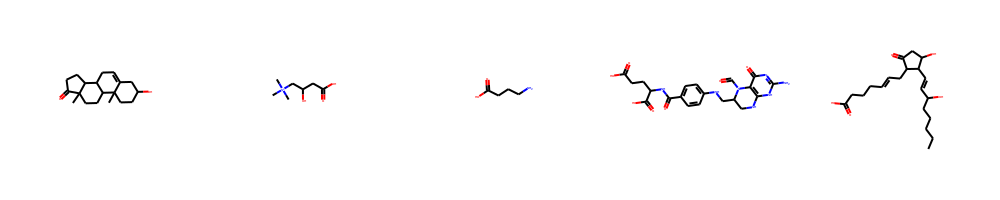

In [ ]:
mol_list = []

for smile in sider.iloc[:5,0]:
  mol = Chem.MolFromSmiles(smile)            # Converting to Molecules images from smiles
  mol_list.append(mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=5)
img

### `Molecular Weights`
    
    Getting Molecular Weights from smiles

In [ ]:
mol_weights = []
mol_str=[]

for smile in sider.iloc[:,0]:
  mol = Chem.MolFromSmiles(smile)
  mol_str.append(mol)
  mol_weights.append(Descriptors.MolWt(mol))


RDKit WARNING: [14:00:37] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:37] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:37] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:37] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:37] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:37] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:37] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:37] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:37] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:37] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:37] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:37] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:37] WARNING: not r

In [ ]:
print(mol_weights)

[288.431, 162.209, 103.12100000000001, 473.44600000000025, 352.47100000000006, 352.471, 267.245, 180.156, 354.487, 176.124, 507.18200000000013, 244.316, 40.078, 323.13200000000006, 386.66400000000016, 35.453, 138.12199999999999, 133.103, 239.74599999999998, 272.388, 182.172, 131.17499999999998, 163.198, 243.21900000000002, 142.201, 196.155, 153.181, 46.069, 785.5570000000001, 146.146, 179.172, 307.32800000000003, 92.09399999999998, 62.02400000000001, 1134.934000000001, 253.808, 39.098, 484.50300000000016, 197.19, 183.207, 776.872, 650.9760000000001, 146.19, 24.305, 232.283, 22.99, 744.4170000000003, 122.12699999999998, 122.10299999999997, 162.23600000000002, 62.004000000000005, 44.013, 169.18, 17.007, 31.998, 96.98599999999999, 74.079, 123.115, 167.16399999999996, 247.14299999999994, 169.17999999999998, 324.4240000000001, 62.137, 286.45900000000006, 179.19699999999997, 96.06299999999999, 125.14899999999999, 241.25100000000003, 265.36199999999997, 242.231, 863.3649999999994, 60.05599999

    Concatenating weights to sider..

In [ ]:
sider['Molecular_Weights']=mol_weights

In [ ]:
sider[:5]

,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Eye disorders,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Immune system disorders,Reproductive system and breast disorders,"Neoplasms benign, malignant and unspecified (incl cysts and polyps)",General disorders and administration site conditions,Endocrine disorders,Surgical and medical procedures,Vascular disorders,Blood and lymphatic system disorders,Skin and subcutaneous tissue disorders,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications",Molecular_Weights
0,CC12CCC3C(C1CCC2=O)CC=C4C3(CCC(C4)O)C,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,288.431
1,C[N+](C)(C)CC(CC(=O)O)O,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,162.209
2,C(CC(=O)O)CN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,103.121
3,C1C(N(C2=C(N1)NC(=NC2=O)N)C=O)CNC3=CC=C(C=C3)C...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,473.446
4,CCCCCC(C=CC1C(CC(=O)C1CC=CCCCC(=O)O)O)O,1,0,0,1,1,1,0,0,1,0,1,1,0,0,1,1,0,1,1,1,0,1,1,1,352.471


### `Radical Electrons`

    Getting no.of radical electrons from smiles

In [ ]:
radical_electrons = []

for smile in sider.iloc[:,0]:
  mol = Chem.MolFromSmiles(smile)
  radical_electrons.append(Descriptors.NumRadicalElectrons(mol))

RDKit WARNING: [14:00:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:53] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:53] WARNING: not r

In [ ]:
sider['Radical Electrons'] =radical_electrons

In [ ]:
sider[:4]

,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Eye disorders,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Immune system disorders,Reproductive system and breast disorders,"Neoplasms benign, malignant and unspecified (incl cysts and polyps)",General disorders and administration site conditions,Endocrine disorders,Surgical and medical procedures,Vascular disorders,Blood and lymphatic system disorders,Skin and subcutaneous tissue disorders,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications",Molecular_Weights,Radical Electrons,Valence Electrons
0,CC12CCC3C(C1CCC2=O)CC=C4C3(CCC(C4)O)C,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,288.431,0,116
1,C[N+](C)(C)CC(CC(=O)O)O,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,162.209,0,66
2,C(CC(=O)O)CN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,103.121,0,42
3,C1C(N(C2=C(N1)NC(=NC2=O)N)C=O)CNC3=CC=C(C=C3)C...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,473.446,0,180


### `Valence Electrons`

In [ ]:
valence_electrons = []

for smile in sider.iloc[:,0]:
  mol = Chem.MolFromSmiles(smile)
  valence_electrons.append(Descriptors.NumValenceElectrons(mol))

RDKit WARNING: [14:00:41] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:41] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:41] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:41] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:41] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:41] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:41] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:41] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:41] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:41] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:41] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:42] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:00:42] WARNING: not r

In [ ]:
sider['Valence Electrons']  = valence_electrons

In [ ]:
sider[:2]

,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Eye disorders,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Immune system disorders,Reproductive system and breast disorders,"Neoplasms benign, malignant and unspecified (incl cysts and polyps)",General disorders and administration site conditions,Endocrine disorders,Surgical and medical procedures,Vascular disorders,Blood and lymphatic system disorders,Skin and subcutaneous tissue disorders,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications",Molecular_Weights,Radical Electrons,Valence Electrons
0,CC12CCC3C(C1CCC2=O)CC=C4C3(CCC(C4)O)C,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,288.431,0,116
1,C[N+](C)(C)CC(CC(=O)O)O,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,162.209,0,66


### Finger Print

In [ ]:
fingerprint = []
bi={}
for smile in sider.iloc[:,0]:
  mol = Chem.MolFromSmiles(smile)
  fingerprint.append(rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi))

RDKit WARNING: [14:01:06] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:01:06] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:01:06] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:01:06] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:01:06] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:01:06] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:01:06] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:01:06] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:01:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:01:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:01:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:01:07] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:01:07] WARNING: not r

In [ ]:
sider['fingerprint']=fingerprint

In [ ]:
sider.head(2)

,smiles,Hepatobiliary disorders,Metabolism and nutrition disorders,Eye disorders,Musculoskeletal and connective tissue disorders,Gastrointestinal disorders,Immune system disorders,Reproductive system and breast disorders,"Neoplasms benign, malignant and unspecified (incl cysts and polyps)",General disorders and administration site conditions,Endocrine disorders,Surgical and medical procedures,Vascular disorders,Blood and lymphatic system disorders,Skin and subcutaneous tissue disorders,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications",Molecular_Weights,Radical Electrons,Valence Electrons,fingerprint
0,CC12CCC3C(C1CCC2=O)CC=C4C3(CCC(C4)O)C,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,288.431,0,116,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
1,C[N+](C)(C)CC(CC(=O)O)O,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,162.209,0,66,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
